In [1]:
import numpy as np
import pandas as pd 


### DATA COLLECTION AND ANALYSIS

In [2]:
df=pd.read_csv("../data/BigMartSalesTrain.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Handiling Missing Value

Mean-->>average value                                                                                                           
Mode-->>Most Repeated Value

In [10]:
df["Item_Weight"].fillna(df.Item_Weight.mean(),inplace=True)
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df[["Outlet_Size","Outlet_Type"]]

,Outlet_Size,Outlet_Type
0,Medium,Supermarket Type1
1,Medium,Supermarket Type2
2,Medium,Supermarket Type1
3,NaN,Grocery Store
4,High,Supermarket Type1
...,...,...
8518,High,Supermarket Type1
8519,NaN,Supermarket Type1
8520,Small,Supermarket Type1
8521,Medium,Supermarket Type2


In [12]:
mode_of_outlet_size=df.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x:x.mode()[0]))

In [14]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [15]:
missing_value=df["Outlet_Size"].isnull()

In [16]:
missing_value

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [17]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [18]:
df[["Outlet_Size","Outlet_Type"]]

,Outlet_Size,Outlet_Type
0,Medium,Supermarket Type1
1,Medium,Supermarket Type2
2,Medium,Supermarket Type1
3,NaN,Grocery Store
4,High,Supermarket Type1
...,...,...
8518,High,Supermarket Type1
8519,NaN,Supermarket Type1
8520,Small,Supermarket Type1
8521,Medium,Supermarket Type2


In [20]:
df.loc[missing_value,"Outlet_Size"]=df.loc[missing_value,"Outlet_Type"].apply(lambda x:mode_of_outlet_size[x])

In [19]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [24]:
df[["Outlet_Size","Outlet_Type"]]

,Outlet_Size,Outlet_Type
0,Medium,Supermarket Type1
1,Medium,Supermarket Type2
2,Medium,Supermarket Type1
3,Small,Grocery Store
4,High,Supermarket Type1
...,...,...
8518,High,Supermarket Type1
8519,Small,Supermarket Type1
8520,Small,Supermarket Type1
8521,Medium,Supermarket Type2


In [25]:
df["Outlet_Size"][3]

'Small'

In [26]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [27]:
sns.set()

<Figure size 432x432 with 0 Axes>

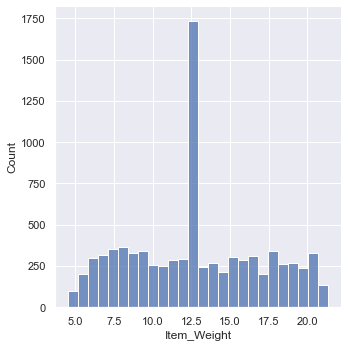

In [28]:
plt.figure(figsize=(6,6))
sns.displot(df["Item_Weight"])
plt.show()

<Figure size 432x432 with 0 Axes>

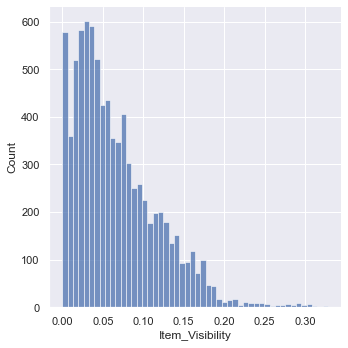

In [29]:
plt.figure(figsize=(6,6))
sns.displot(df["Item_Visibility"])
plt.show()

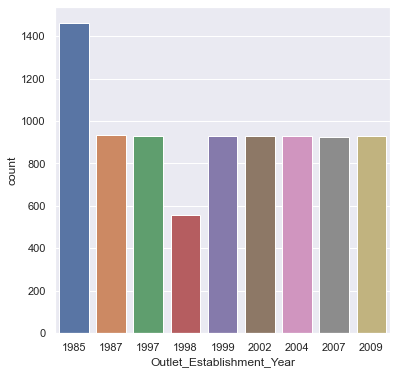

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year",data=df)
plt.show()

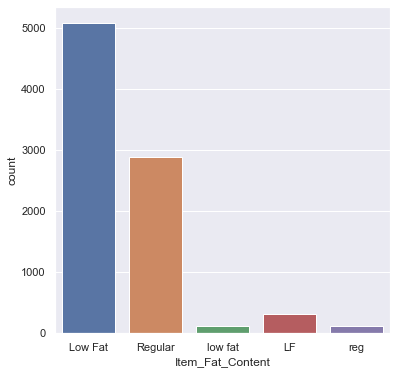

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content",data=df)
plt.show()

In [32]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [33]:
df.replace({"Item_Fat_Content":{"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"}},inplace=True)
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [34]:
df["Item_Fat_Content"]

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [35]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
dammy=["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
dammy

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [39]:
encoder=LabelEncoder()

In [40]:
df["Item_Identifier"]=encoder.fit_transform(df["Item_Identifier"])

In [41]:
df["Item_Fat_Content"]=encoder.fit_transform(df["Item_Fat_Content"])


In [42]:
df["Item_Type"]=encoder.fit_transform(df["Item_Type"])
df["Outlet_Identifier"]=encoder.fit_transform(df["Outlet_Identifier"])

In [43]:
df["Outlet_Size"]=encoder.fit_transform(df["Outlet_Size"])

In [44]:
df["Outlet_Location_Type"]=encoder.fit_transform(df["Outlet_Location_Type"])
df["Outlet_Type"]=encoder.fit_transform(df["Outlet_Type"])

In [45]:
dammy=pd.DataFrame(columns=dammy)

In [46]:
type(dammy)

pandas.core.frame.DataFrame

In [53]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [55]:
X=df.drop(columns="Item_Outlet_Sales",axis=1)

In [56]:
y=df["Item_Outlet_Sales"]

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

#### XGboost Regressor

In [57]:
regressor=XGBRegressor()

In [59]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
training_data_prediction=regressor.predict(X_train)

In [63]:
training_data_prediction==y_train

7173    False
3315    False
5932    False
7872    False
5946    False
        ...  
1099    False
2514    False
6637    False
2575    False
7336    False
Name: Item_Outlet_Sales, Length: 6818, dtype: bool

In [65]:
regressor.score(X_train,y_train)

0.8639680373364909

In [66]:
regressor.score(X_test,y_test)

0.5233136709735687

In [67]:
metrics.r2_score(y_train,training_data_prediction)

0.8639680373364909